In [0]:
import pandas as pd
import numpy as np
import re
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
import sklearn.metrics as accuray_score
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import math

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1v23t6JYD3RfaEIpTa-BTfXrHnaglDt52'

In [0]:
fluff, id = link.split ('=') 

print (id)

1v23t6JYD3RfaEIpTa-BTfXrHnaglDt52


In [0]:
downloaded = drive.CreateFile ({'id': id}) 
downloaded.GetContentFile ('t_ml.csv') 
df3 = pd.read_csv ('t_ml.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Feature 1 event id**: Um sistema de identificação de eventos de 12 dígitos. Primeiros 8 números - data registrada “aaaammdd”. Últimos 4 números - número do caso seqüencial para o dia dado (0001, 0002 etc).


**Feature 2 iyear**: Ano

**Feature 3 imonth**: Mês

**Feature 4 iday**: Dia

**Feature 5 approxdate**: Um String para descrever a data. Obs(95% null)  

**Feature 6 extended**: Dado binario sobre a duração do ataque. 1 = "Sim" A duração de um incidente prolongou-se por mais de 24 horas. 0 = "Não" A duração de um incidente prolongou-se por menos de 24 horas.

**Feature 7 resolution**: Resolução do caso, mostrando datas . Obs(99% null)

**Feature 8 country**: Este campo identifica o código do país

**Feature 9 iday country_txt** :Este campo é o nome do País ou local. Obs (já que temos a indentificação do país podemos tirar esse campo)

**Feature 10 region**: Este campo identifica o código da região com base em 12 regiões

1 = North America

2 = Central America & Caribbean

3 = South America

4 = East Asia

5 = Southeast Asia

6 = 

8 =	Western Europe

9	 = Eastern Europe

10	= Middle East & North Africa

11 =	Sub-Saharan Africa

**Feature 11 region_text**: Este campo indentifica os nomes das 12 regiões. Obs(já que temos os códigos das regiãos podemos tira esse campo)

**Feature 12 provstate**: Região administrativa subnacional (no momento do evento). 

**Feature 13 city**: Cidades 

**Feature 14 latitudes**: latitude 

**Feature 15 longitude**: longitude

**Feature 16 specificity**: Esse campo se refere a especificidade. varia de 1 à 5

**Feature 17 vicinity**: 168.90 composto de 0 

**Feature 18 location**:  Localização.Obs(69% null)

**Feature 19 summary**: Descrição do evento.Obs(Como se trata de um texto descrevendo como foi o ataque possivelmente será descartado)

**Feature 20 crit1**: Esse campo não possui descrição, mas são dados binarios entre 0 e 1 
porém todos os lacunas  estão sendo ocupados com 1. 

**Feature 21 crit2**:Esse campo não possui descrição, mas são dados binarios entre 0 e 1 
porém todos os lacunas  estão sendo ocupados com 1.

**Feature 22 crit3**:Esse campo não possui descrição, mas são dados binarios entre 0 e 1 
porém quase todos os lacunas  estão sendo ocupados com 1.

**Feature 23 doubtterr**:Dados em sua maioria composto por zero.


**Feature 24 alternative**: Esse dados vou tirar, pelo motivo que é mais um campo unido com outro e o outro campo está 84% null.

**Feature 25 alternative_txt**:  Esse campos está 84% null.


**Feature 26 multiple**: Campo binario 

**Feature 27 success**:Campo binario sobre o sucesso de um ataque terrorista


**Feature 28 suicide**: Esse campo diz se o ataque foi suicida. 1 = "Sim" O incidente foi um ataque suicida. 0 = "Não" Não há indicação de que o incidente tenha sido um ataque suicida


**Feature 29 attacktype1**:  Esse campo indentifica o ataque através de um codigo. 


**Feature 30 attacktype1_txt**: Esse campo descre o tipo de ataque do attacktype1. Obs(esse campo pode ser excluido já que temos o cod)


**Feature 31 attacktype2**:Esse dados vou tirar, pelo motivo que é mais um campo unido com outro e o outro campo está 92% null.

**Feature 32 attacktype2_ txt**:Esse campos está 92% null.

**Feature 33 attacktype3**: Este campo não possui descrição e está 100% null.

**Feature 34 attacktype3_txt**:  Este campo não possui descrição e está 100% null.

**Feature 35 targtype1**:  Esse campo tem o codigo que representa o tipo de alvo.

**Feature 36 targtype1_txt**: Esse campo tem o que cada codigo do targtype1

**Feature 37 targsubtype1**:Esse campo tem o codigo que representa o subtipo de alvo.

**Feature 38 targsubtype1_txt**:Esse campo tem o que cada codigo do targsubtype1

**Feature 39 corp1**: Corp afetada.

**Feature 40 target1**: A pessoa específica, a construção, a instalação que foi segmentada e / ou vitimizada

**Feature 41 natlty1**: Codigo referente a nacionalidade do alvo que foi atacado 

**Feature 42 natlty1_txt** : A nacionalidade do alvo que foi atacado

**Feature 43 targtype2** :   Este campo não possui descrição e está 92% null.


**Feature 44 targtype2_txt** : Este campo não possui descrição e está 92% null.

**Feature 45 targsubtype2** : Este campo não possui descrição e está 94% null.

**Feature 46 targsubtype2_txt** : Este campo não possui descrição e está 94% null.

**Feature 47 corp2** : Este campo não possui descrição e está 94% null.

**Feature 48 target2**: Este campo não possui descrição e está 94% null.

**Feature 49 natity2** : Este campo não possui descrição e está 94% null.

**Feature 50 natity2_txt** : Este campo não possui descrição e está 94% null.

**Da feature 51 à 58 estão 99 % null**

**Feature 59 gname** : Nome do grupo que fez o atentado feature deve ser excluidar.

**Feature 60 gsubname**: Descrição do grupo reponsavel pelo atentado.

**Dar feature 61 à 69 dados com 100% de null ou sem a possibilidade de uso**

**Feature 70 nperps** : Quantos terrorista envolvidos.

**Dar feature 71 à 80 dados com 100% de null ou sem a possibilidade de uso**

**Feature 81 compclaim** :  Este campo não possui descrição e está 97% null.

**Feature 82 weaptype1** : codigo que vai de 1 a 13 para o tipo de arma utilizada.

**Feature 83 weaptype1_txt** :  Tipo geral de arma usada no incidente

**Feature 84 weapsubtype1** : codigo que vai de 1 a 31 para o subtipo de arma utilizada.

**Feature 85 weapsubtype1_txt**: subtipo geral de arma usada no incidente

**Feature 86 weapsubtype1_txt**

**Dar feature 87 à 98 dados com 100% de null ou sem a possibilidade de uso**

**Feature 99 nkill** : Numeros de mortos no atentado.

**Feature 100 nkillus** : Numeros de mortos americanos no atentado.

**Feature 101 nkillter** : Não possui descrição, mas acho que é numero de teroristas mortos.

**Feature 102 nwound** : Numero de vitimas não letais 

**Feature 103 nwoundus** : Numero de vitimas não letais americanos.

**Feature 104 nwoundte** : Não possui descrição, mas acho que é numero de teroristas feridos não letais.

**Feature 105 property**: Não possui descrição porém pelo nome dar para deduzir que é o numero de propriedades atingidas.

**Feature 106 property**:  codigo Valor estimado do danos em reais.

**Feature 107 property_txt**: Valor estimado do danos em reais.

**Feature 108 propvalue**: Valor do dano na proriedade.

**Feature 109 propcomment** Comentario sobre o dano na propriedade.

**Feature 110 ishostkid**:  Criança afetadas.

**Dar feature 111 à 135 dados com 100% de null ou sem a possibilidade de uso**









In [0]:
df = df3
vet = []
df.columns[0]

'eventid'

In [0]:
i = 0
c = 0
v = df.shape

colmns = np.arange(v[i])
for i in colmns:
  if(df[df.columns[i]].isnull().sum() > 150000 or re.search('_txt', df.columns[i])):
    vet.append(i)
    c = c + 1


IndexError: ignored

In [0]:
vet.append(0)
vet.append(11)
vet.append(12)
vet.append(18)
vet.append(58)
vet.append(108)




In [0]:
df3.drop(df3.columns[vet],axis=1, inplace=True)


In [0]:
vet2 = [10,22,23,25,33,45,46,47,48,49]
df3.drop(df3.columns[vet2],axis=1, inplace=True)

In [0]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 44 columns):
iyear           181691 non-null int64
imonth          181691 non-null int64
iday            181691 non-null int64
extended        181691 non-null int64
country         181691 non-null int64
region          181691 non-null int64
latitude        177135 non-null float64
longitude       177134 non-null float64
specificity     181685 non-null float64
vicinity        181691 non-null int64
crit1           181691 non-null int64
crit2           181691 non-null int64
crit3           181691 non-null int64
doubtterr       181690 non-null float64
alternative     29011 non-null float64
multiple        181690 non-null float64
success         181691 non-null int64
suicide         181691 non-null int64
attacktype1     181691 non-null int64
targtype1       181691 non-null int64
targsubtype1    171318 non-null float64
natlty1         180132 non-null float64
guncertain1     181311 non-null float6

In [0]:
df3.head()
df3.columns
col = ['iyear', 'imonth', 'iday', 'extended', 'country', 'region', 'latitude',
       'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'multiple', 'success', 'suicide',
       'attacktype1', 'targtype1', 'targsubtype1', 'natlty1', 'guncertain1',
       'individual', 'nperps', 'nperpcap', 'claimed', 'weaptype1',
       'weapsubtype1', 'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus',
       'nwoundte', 'property', 'propextent', 'propvalue', 'ishostkid',
       'ransom', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY']

In [0]:
inp = SimpleImputer(missing_values=np.nan, strategy ='most_frequent')

df1 = inp.fit_transform(df3)


In [0]:
df_new = pd.DataFrame(df1, columns = col)

In [0]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 44 columns):
iyear           181691 non-null float64
imonth          181691 non-null float64
iday            181691 non-null float64
extended        181691 non-null float64
country         181691 non-null float64
region          181691 non-null float64
latitude        181691 non-null float64
longitude       181691 non-null float64
specificity     181691 non-null float64
vicinity        181691 non-null float64
crit1           181691 non-null float64
crit2           181691 non-null float64
crit3           181691 non-null float64
doubtterr       181691 non-null float64
alternative     181691 non-null float64
multiple        181691 non-null float64
success         181691 non-null float64
suicide         181691 non-null float64
attacktype1     181691 non-null float64
targtype1       181691 non-null float64
targsubtype1    181691 non-null float64
natlty1         181691 non-null float64
guncertai

In [0]:
df_new.head()

,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,...,nwoundte,property,propextent,propvalue,ishostkid,ransom,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1970.0,7.0,2.0,0.0,58.0,2.0,18.456792,-69.951164,1.0,0.0,...,0.0,0.0,3.0,-99.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1970.0,0.0,0.0,0.0,130.0,1.0,19.371887,-99.086624,1.0,0.0,...,0.0,0.0,3.0,-99.0,1.0,1.0,0.0,1.0,1.0,1.0
2,1970.0,1.0,0.0,0.0,160.0,5.0,15.478598,120.599741,4.0,0.0,...,0.0,0.0,3.0,-99.0,0.0,0.0,-9.0,-9.0,1.0,1.0
3,1970.0,1.0,0.0,0.0,78.0,8.0,37.997490,23.762728,1.0,0.0,...,0.0,1.0,3.0,-99.0,0.0,0.0,-9.0,-9.0,1.0,1.0
4,1970.0,1.0,0.0,0.0,101.0,4.0,33.580412,130.396361,1.0,0.0,...,0.0,1.0,3.0,-99.0,0.0,0.0,-9.0,-9.0,1.0,1.0


In [0]:
cols = ['iyear', 'imonth', 'iday', 'extended', 'country', 'region', 'latitude',
       'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'multiple','suicide',
       'attacktype1', 'targtype1', 'targsubtype1', 'natlty1', 'guncertain1',
       'individual', 'nperps', 'nperpcap', 'claimed', 'weaptype1',
       'weapsubtype1', 'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus',
       'nwoundte', 'property', 'propextent', 'propvalue', 'ishostkid',
       'ransom', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY','success']

In [0]:
df_new = df_new.reindex(columns= cols)

In [0]:
df_new.head()


,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,...,property,propextent,propvalue,ishostkid,ransom,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,success
0,1970.0,7.0,2.0,0.0,58.0,2.0,18.456792,-69.951164,1.0,0.0,...,0.0,3.0,-99.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1970.0,0.0,0.0,0.0,130.0,1.0,19.371887,-99.086624,1.0,0.0,...,0.0,3.0,-99.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
2,1970.0,1.0,0.0,0.0,160.0,5.0,15.478598,120.599741,4.0,0.0,...,0.0,3.0,-99.0,0.0,0.0,-9.0,-9.0,1.0,1.0,1.0
3,1970.0,1.0,0.0,0.0,78.0,8.0,37.997490,23.762728,1.0,0.0,...,1.0,3.0,-99.0,0.0,0.0,-9.0,-9.0,1.0,1.0,1.0
4,1970.0,1.0,0.0,0.0,101.0,4.0,33.580412,130.396361,1.0,0.0,...,1.0,3.0,-99.0,0.0,0.0,-9.0,-9.0,1.0,1.0,1.0


In [0]:
df_new.corr().style.background_gradient(cmap='RdYlGn', axis=None).set_precision(2)
 

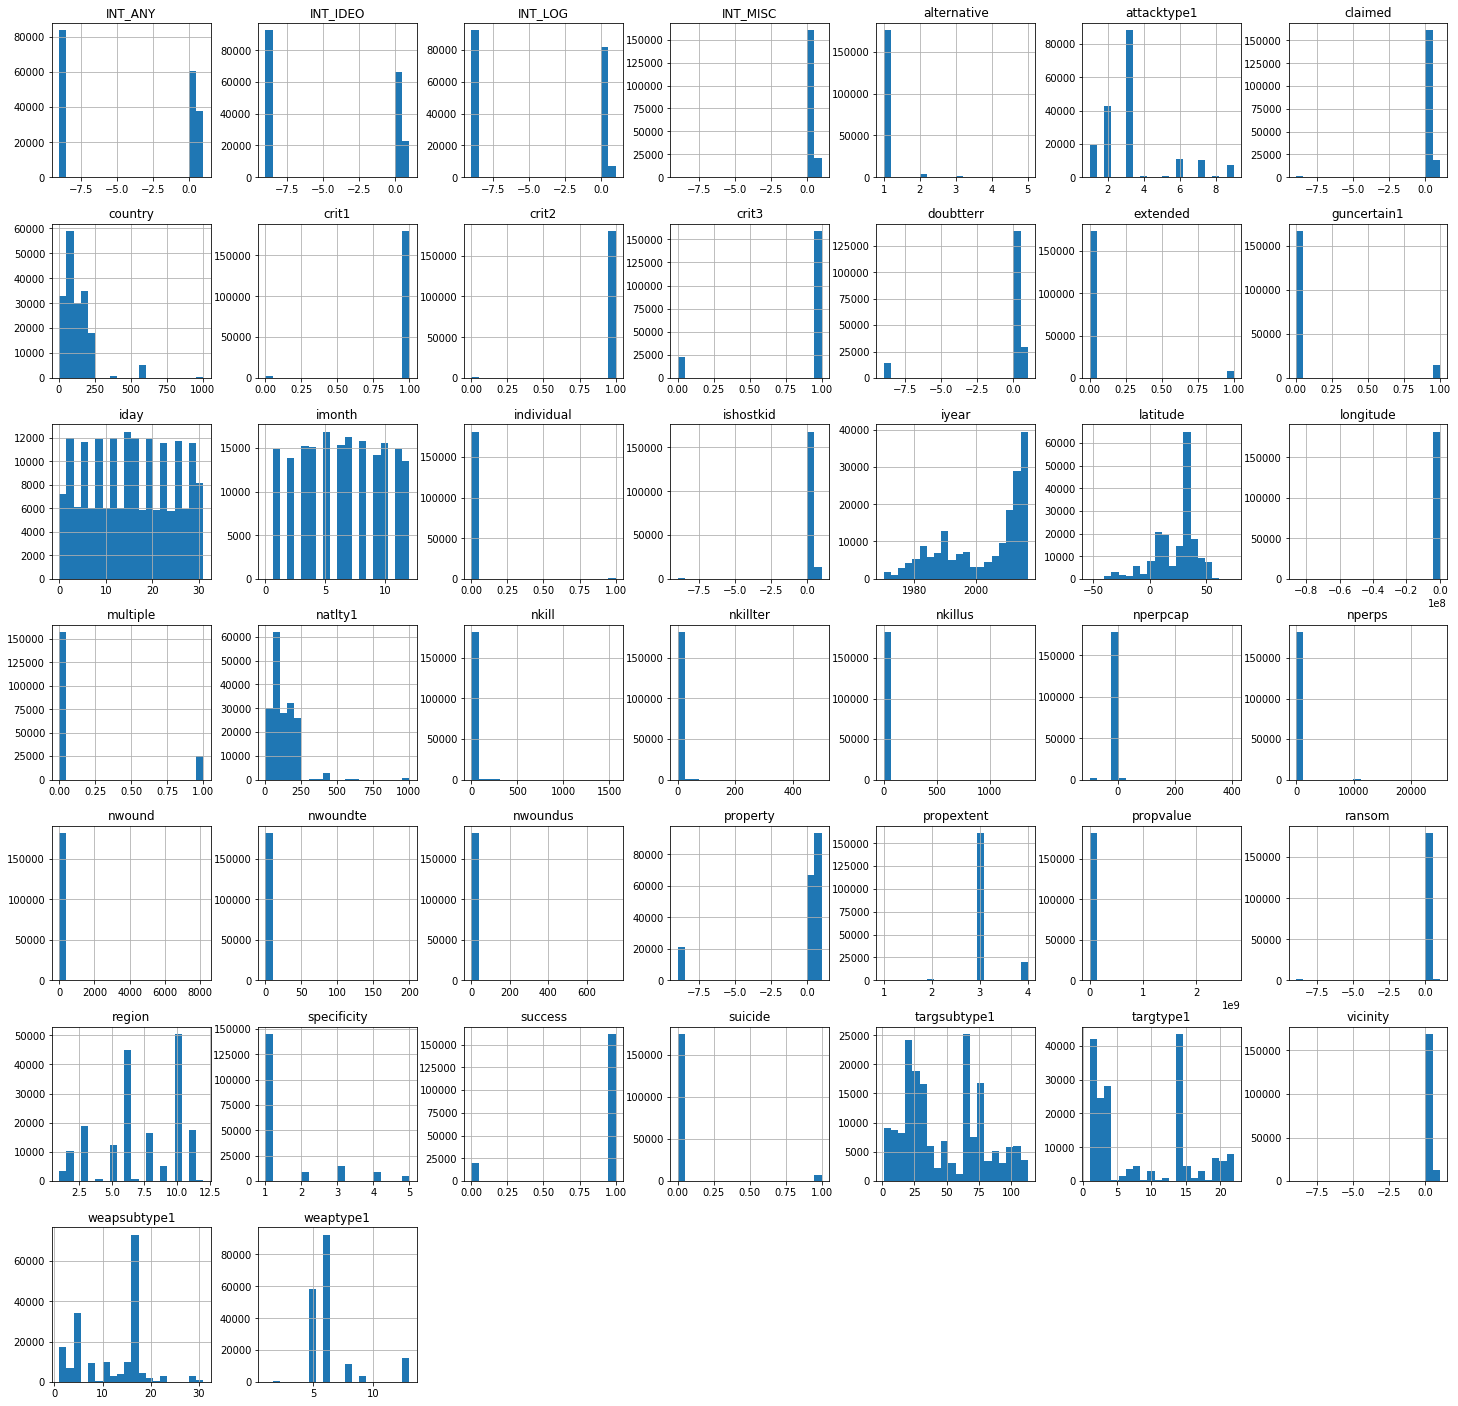

In [0]:
df_new.hist(bins = 20, figsize =(25,25));

In [0]:
df = df_new.values
np.random.seed(1) 
np.random.shuffle(df)

In [0]:
X = df[:, :-1];
y = df[:,-1];
y

array([1., 1., 1., ..., 1., 1., 1.])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [0]:
model = Perceptron()
model.fit(X_train, y_train)
pred = model.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [0]:
ac = sum(y_test == pred)/pred.shape
ac

array([0.84400455])

In [0]:
model2 = SGDClassifier()
model2.fit(X_train, y_train)
pred2 = model2.predict(X_test)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [0]:
ac2 = sum(y_test == pred2)/pred2.shape
ac2

array([0.71655537])